In [26]:
# import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go

from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import os 

color_pal = sns.color_palette() 
plt.style.use('fivethirtyeight')

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [27]:
# create our database engine
load_dotenv()

engine = create_engine(os.getenv("connection_string"), connect_args={
        "ssl": {
            "ssl_ca": "/etc/ssl/certs/ca-certificates.crt",
        }
    })

In [28]:
# query function input your query as a string
# returns a pandas df

def query(text_string):
  with engine.connect() as conn:
    query = text(text_string)
    df = pd.read_sql_query(query, conn)
    return df

In [4]:
crime_by_year = query("""SELECT YEAR, COUNT(*) as COUNT
                FROM totalcrime
                GROUP BY year
                ORDER BY YEAR ASC""")

In [5]:
print(crime_by_year)

    YEAR   COUNT
0   2010  199505
1   2011  196714
2   2012  199090
3   2013  191142
4   2014  174336
5   2015  208454
6   2016  224003
7   2017  229976
8   2018  229068
9   2019  218961
10  2020  191176
11  2021  206824
12  2022  233003
13  2023  119200


In [6]:
crime_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   YEAR    14 non-null     int64
 1   COUNT   14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


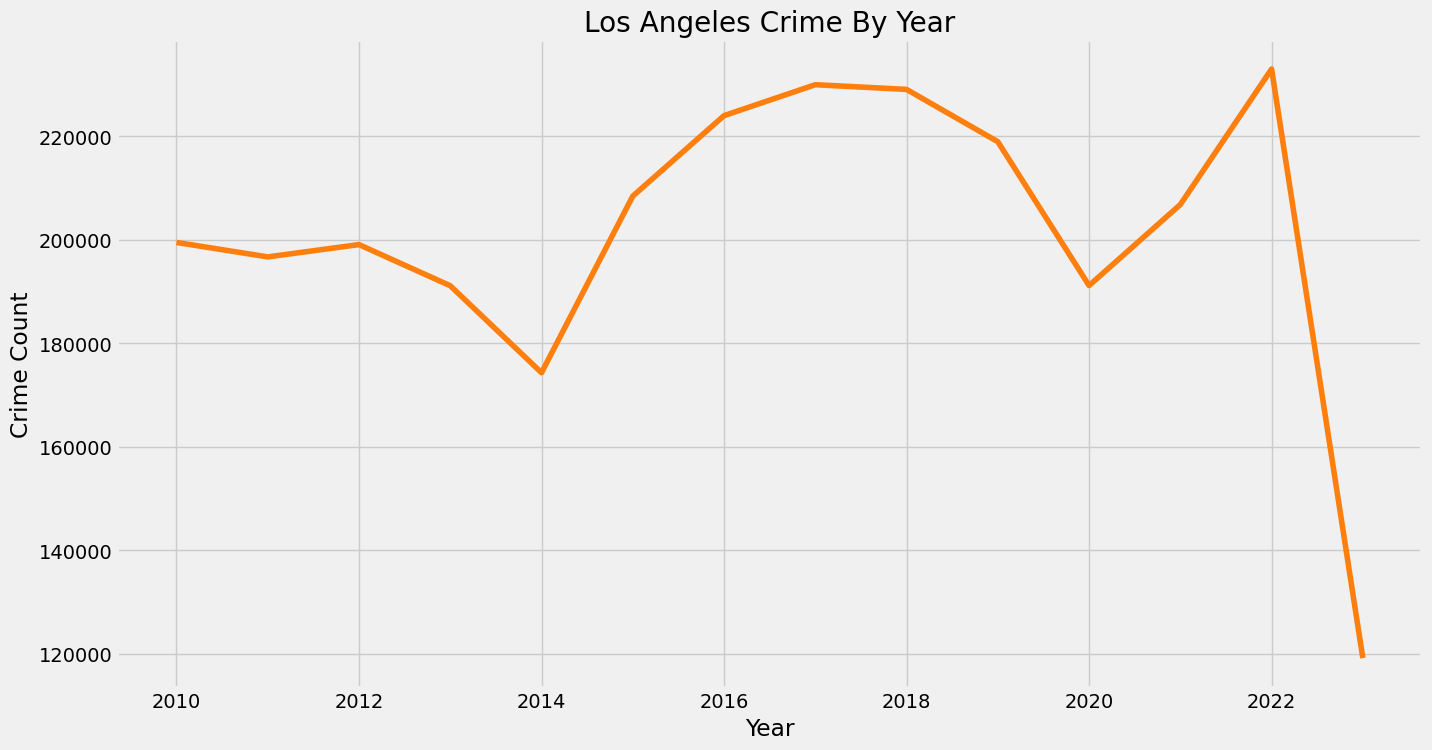

In [7]:
# Los Angeles Crime from 2010 to 2023
plt.figure(figsize=(15,8))
sns.lineplot(data = crime_by_year, x = "YEAR", y = "COUNT", color = color_pal[1])
plt.title("Los Angeles Crime By Year")
plt.ylabel("Crime Count")
plt.xlabel("Year")
plt.show()

In [14]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=crime_by_year.YEAR, y=crime_by_year.COUNT, mode = "lines+markers",    
            marker=dict(
            color='LightSkyBlue',
            size=8,
            line=dict(
                color='MediumBlue',
                width=1
            )
                        )))


fig.update_layout(
    title={
        'text': "Yearly Crime",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    plot_bgcolor='white',
    xaxis = {'title': 'Year'},
    yaxis = {'title':'Crime Count'}
    )

# Add a subtitle using annotations
fig.add_annotation(
    xref='paper', yref='paper',  # Use paper coordinates
    x=0.5, y=1.10,  # Position of the subtitle
    text='(Source data.lacity.org)',  # Subtitle text
    showarrow=False,
)

fig.show()

fig.write_image("Static/Images/crime_year.png", width=800, height=500, scale=2)

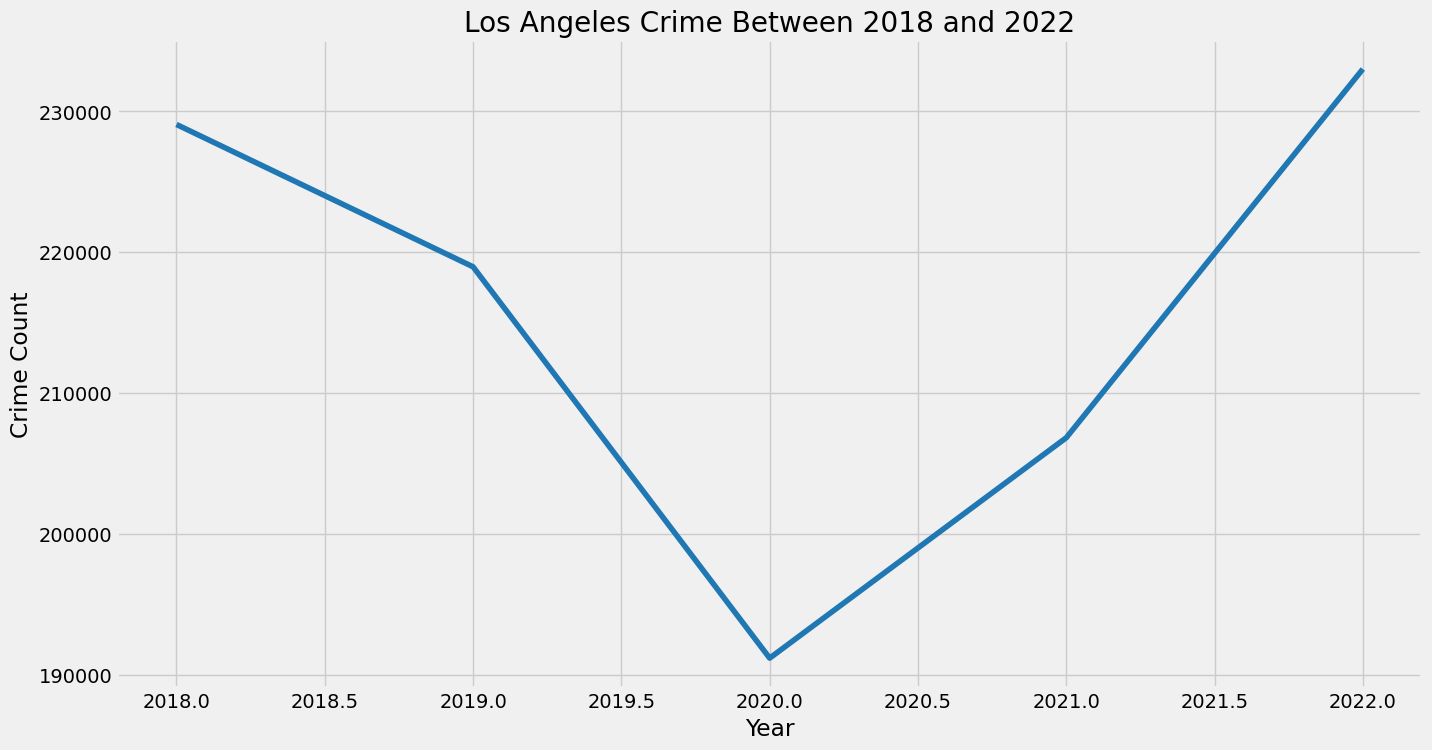

In [9]:
crime_22 = crime_by_year.loc[crime_by_year['YEAR'].isin([2019,2018,2020,2021,2022])]
plt.figure(figsize=(15,8))
sns.lineplot(data = crime_22, x = "YEAR", y = "COUNT", color = color_pal[0])
plt.title("Los Angeles Crime Between 2018 and 2022")
plt.ylabel("Crime Count")
plt.xlabel("Year")
plt.show()

In [17]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=crime_22.YEAR, y=crime_22.COUNT, mode = "lines+markers",    
            marker=dict(
            color='MediumBlue',
            size=8,
            line=dict(
                color='MediumBlue',
                width=1
            )
                        )))

x_labels= [2018,2019,2020,2021,2022]

fig.update_layout(
    title={
        'text': "Yearly Crime",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    plot_bgcolor='white',
    xaxis = {'title': 'Year',
                'tickvals': crime_22.YEAR,
                'ticktext': x_labels},
    yaxis = {'title':'Crime Count'}
    )

# Add text labels using annotations
for x_val, y_val, label in zip(crime_22.YEAR, crime_22.COUNT, crime_22.COUNT):
    fig.add_annotation(
        x=x_val,
        y=y_val,
        text= f"{label:,}",
        showarrow=True,
        arrowhead=1,
        arrowcolor='black',
        font=dict(size=10),
    )
    
# Add a subtitle using annotations
fig.add_annotation(
    xref='paper', yref='paper',  # Use paper coordinates
    x=0.5, y=1.10,  # Position of the subtitle
    text='Between 2018 and 2022',  # Subtitle text
    showarrow=False,
)
    
fig.show()
fig.write_image("Static/Images/crime_2018_2022.png", width=800, height=500, scale=2)

In [19]:
area_crime = query("""
                      SELECT AREA_NAME, COUNT(*) as COUNT
                      FROM totalcrime
                      GROUP BY AREA_NAME
                      ORDER BY COUNT(*) ASC """)

area_2022 = query("""
                    SELECT AREA_NAME, COUNT(*) as COUNT
                    FROM totalcrime
                    WHERE YEAR IN (2020,2021,2022,2023)
                    GROUP BY AREA_NAME
                    ORDER BY COUNT(*) ASC """)

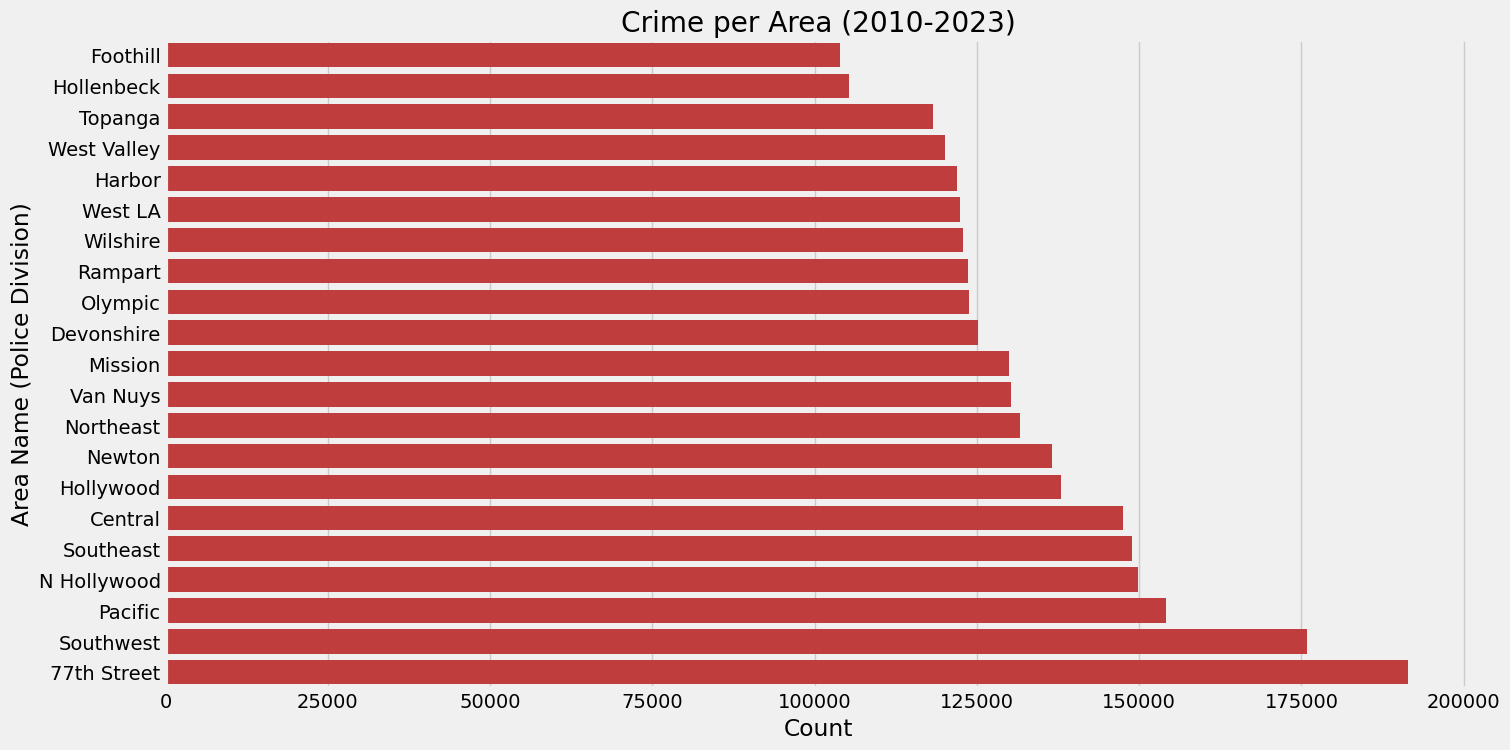

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(data = area_crime, y = "AREA_NAME", x = "COUNT", color = color_pal[3])
plt.title("Crime per Area (2010-2023)")
plt.ylabel("Area Name (Police Division)")
plt.xlabel("Count")
plt.show()

In [23]:
fig = go.Figure()

text_label = [f"{label:,}" for label in area_crime.COUNT]

fig.add_trace(go.Bar(y=area_crime.AREA_NAME,
                      x=area_crime.COUNT,
                      text = text_label,
                      orientation = "h"))

fig.update_layout(
  width=880,
  height= 700,
  title = {
        'text': "Area Crime",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
  xaxis = dict(title = "Crime Count"),
  yaxis= dict(title = "Area Name - Police Division")
)

# Add a subtitle using annotations
fig.add_annotation(
    xref='paper', yref='paper',  # Use paper coordinates
    x=0.48, y=1.1,  # Position of the subtitle
    text='2010 to July 2023',  # Subtitle text
    showarrow=False,
)
fig.show()
fig.write_image("Static/Images/area_year.png", width=800, height=500, scale=2)

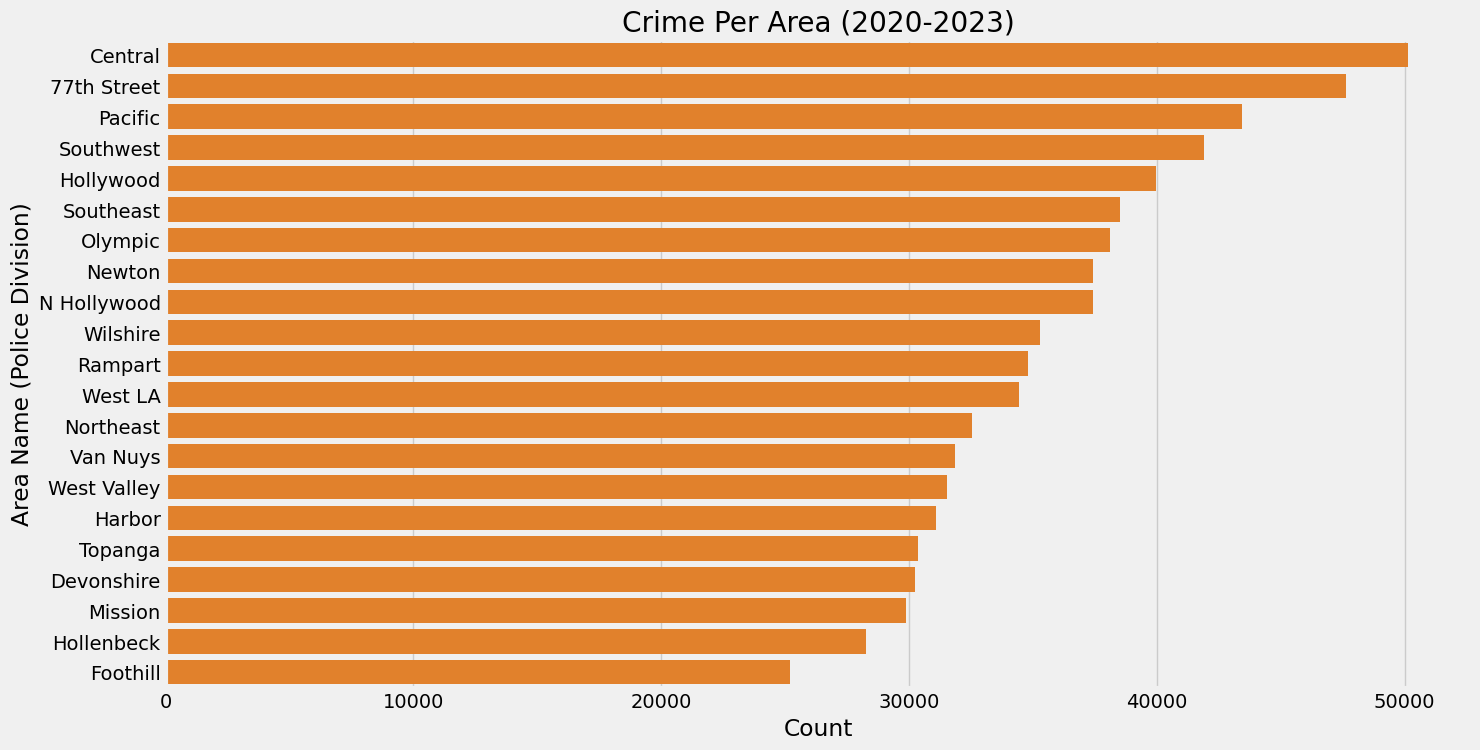

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data = area_2022, y = "AREA_NAME", x = "COUNT", color = color_pal[1])
plt.title("Crime Per Area (2020-2023)")
plt.ylabel("Area Name (Police Division)")
plt.xlabel("Count")
plt.show()

In [24]:
fig = go.Figure()

text_label = [f"{label:,}" for label in area_2022.COUNT]

fig.add_trace(go.Bar(y=area_2022.AREA_NAME,
                        x=area_2022.COUNT,
                        text = text_label,
                        orientation = "h", 
                        marker=dict(
                        color='orange'       # Set a single color for all bars
    )))

fig.update_layout(
    width=880,
    height= 700,
    title = {
        'text': "Area Crime",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis = dict(title = "Crime Count"),
    yaxis= dict(title = "Area Name")
)

# Add a subtitle using annotations
fig.add_annotation(
    xref='paper', yref='paper',  # Use paper coordinates
    x=0.48, y=1.1,  # Position of the subtitle
    text='2020 to July 2023',  # Subtitle text
    showarrow=False,
)

fig.show()
fig.write_image("Static/Images/area_2020_2023.png", width=800, height=500, scale=2)

In [29]:
area_year = query("""
                    SELECT YEAR, AREA_NAME, COUNT(*) as COUNT
                    FROM totalcrime
                    GROUP BY YEAR, AREA_NAME
                    ORDER BY YEAR ASC, COUNT(*) DESC """)

year_quarter_crime = query("""
                          SELECT YEAR, QUARTER, COUNT(*) as COUNT
                          FROM totalcrime
                          WHERE YEAR BETWEEN 2018 AND 2023
                          GROUP BY YEAR, QUARTER
                          ORDER BY YEAR ASC, COUNT(*) DESC""")

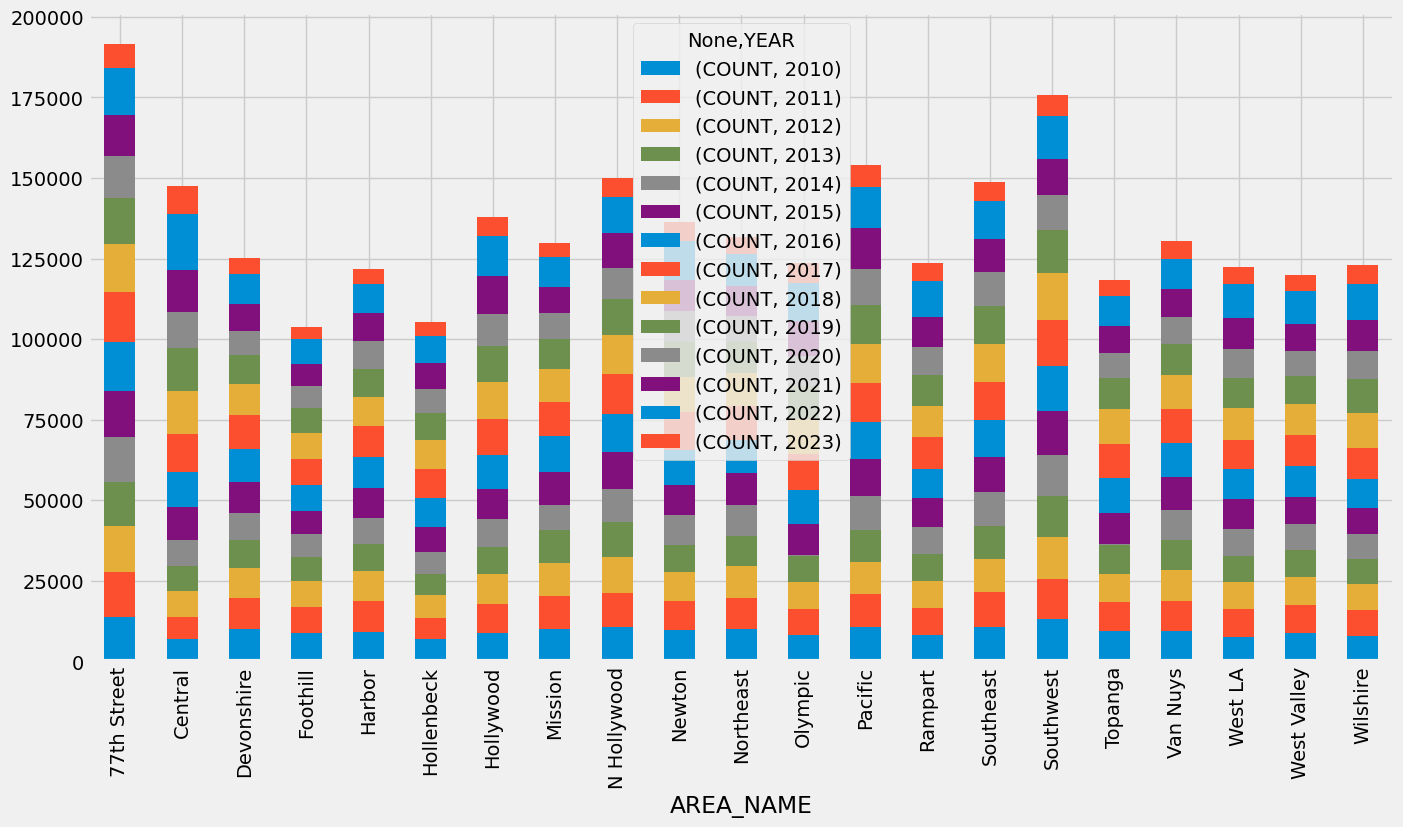

In [33]:
area_year_pivot = area_year.pivot_table(index="AREA_NAME", columns = "YEAR")

area_year_pivot.plot(kind='bar', stacked = True, figsize = (15,8))
plt.show()

In [31]:
area_year

,YEAR,AREA_NAME,COUNT
0,2010,77th Street,13846
1,2010,Southwest,13091
2,2010,N Hollywood,10833
3,2010,Southeast,10603
4,2010,Pacific,10588
...,...,...,...
289,2023,Topanga,4891
290,2023,Harbor,4726
291,2023,Mission,4559
292,2023,Hollenbeck,4309


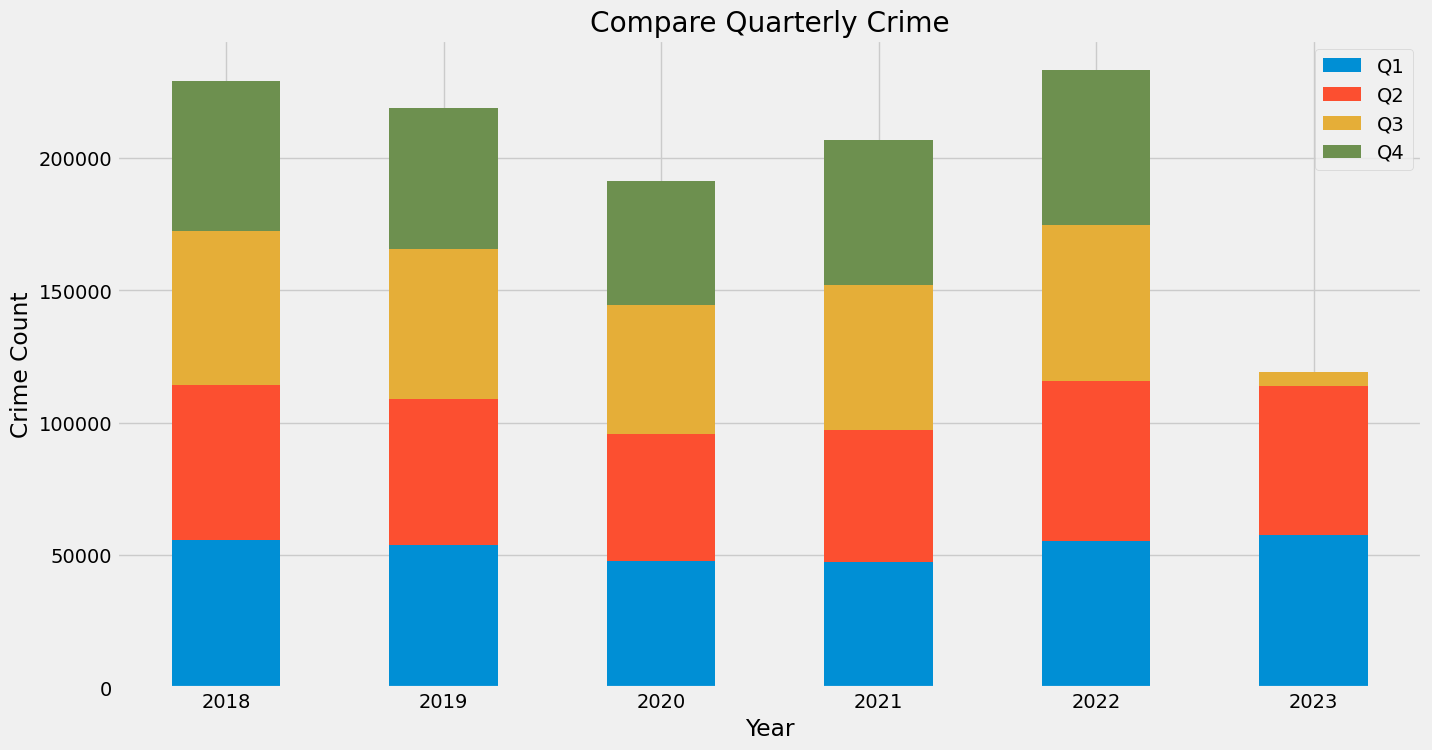

In [32]:
df = year_quarter_crime.copy()

df_pivot = df.pivot_table(index = "YEAR", columns = "QUARTER")
df_pivot.plot(kind='bar', stacked = True,  figsize = (15,8))
plt.title("Compare Quarterly Crime")
plt.ylabel("Crime Count")
plt.xlabel("Year")
plt.xticks(rotation = 360)
plt.legend(['Q1','Q2','Q3','Q4'])

In [34]:
crime_type = query("""
                    SELECT CRM_CD_DESC, COUNT(*) as COUNT
                    FROM totalcrime
                    GROUP BY CRM_CD_DESC
                    ORDER BY COUNT(*) DESC
                    LIMIT 15 """)

crime_top = query("""
                    SELECT CRM_CD_DESC, COUNT(*) as COUNT
                    FROM totalcrime
                    WHERE YEAR BETWEEN 2018 AND 2023
                    GROUP BY CRM_CD_DESC
                    ORDER BY COUNT(*) DESC
                    LIMIT 10 """)


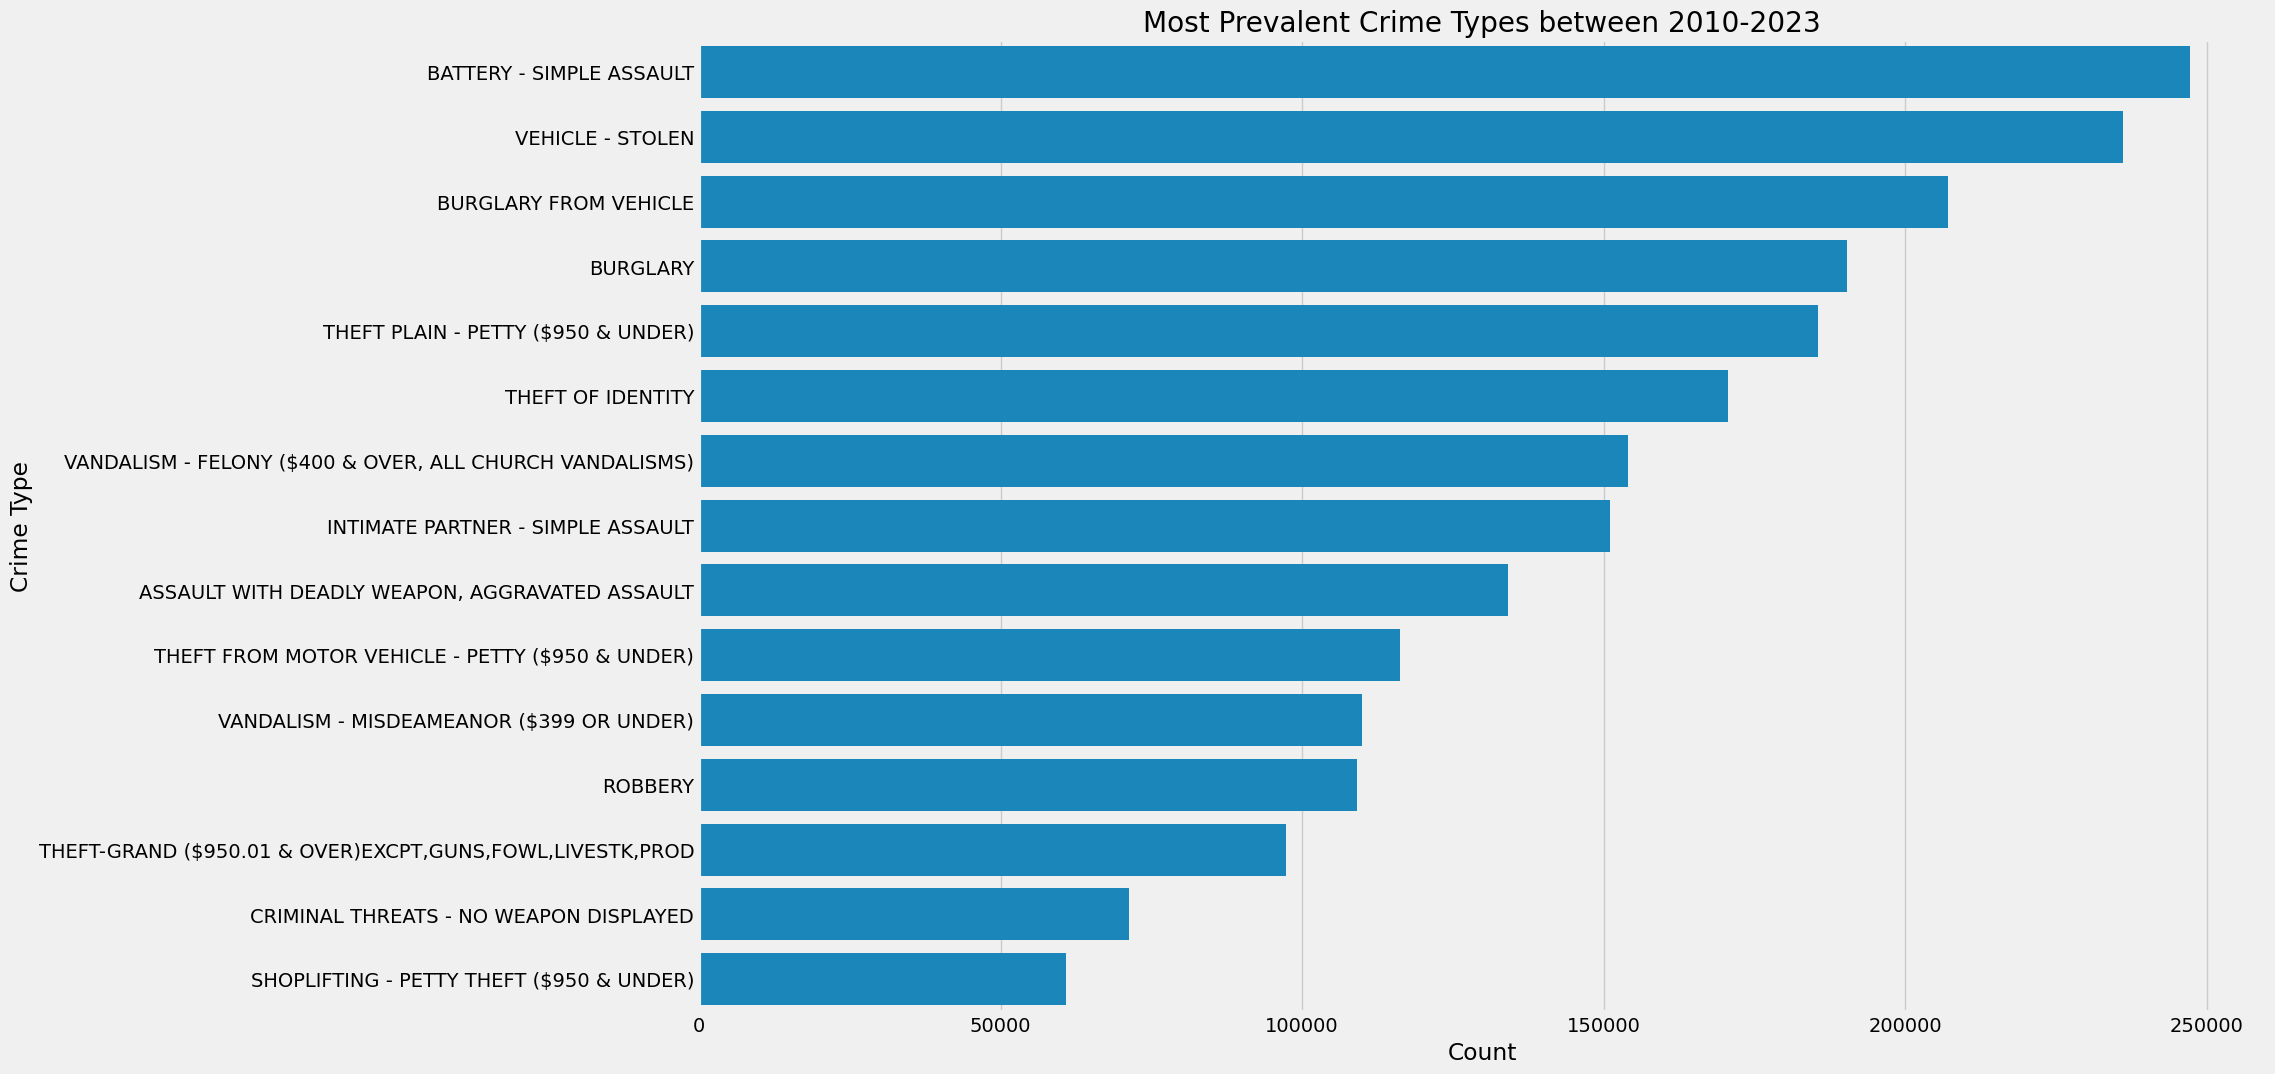

In [37]:
plt.figure(figsize=(18,12))
sns.barplot(data = crime_type, y = "CRM_CD_DESC", x = "COUNT", color = color_pal[0])
plt.title("Most Prevalent Crime Types between 2010-2023")
plt.ylabel("Crime Type")
plt.xlabel("Count")
plt.show()

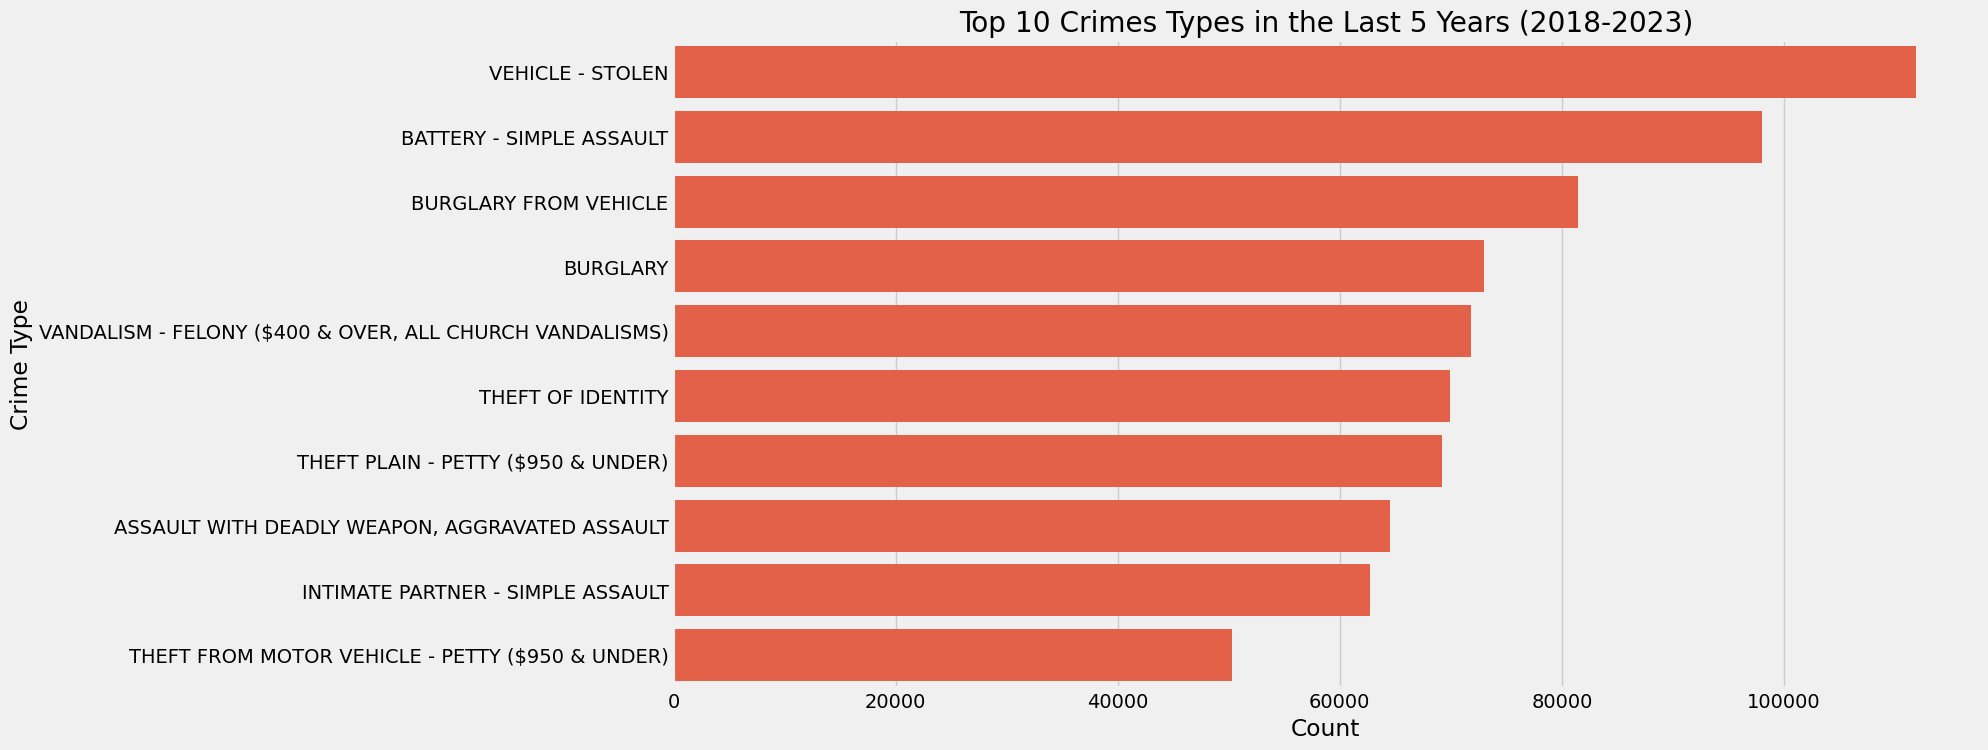

In [38]:
plt.figure(figsize=(15,8))
sns.barplot(data = crime_top, y = "CRM_CD_DESC", x = "COUNT", color = color_pal[1])
plt.title("Top 10 Crimes Types in the Last 5 Years (2018-2023)")
plt.ylabel("Crime Type")
plt.xlabel("Count")
plt.show()

In [39]:
vict_avg = query("""
                  SELECT VICT_DESCENT, AVG(VICT_AGE) as AVG
                  FROM totalcrime
                  WHERE YEAR BETWEEN 2018 AND 2023
                  GROUP BY VICT_DESCENT """)

vict_sex = query("""
                  SELECT VICT_SEX, COUNT(*) as COUNT
                  FROM totalcrime
                  WHERE YEAR BETWEEN 2018 AND 2023
                  GROUP BY VICT_SEX """)


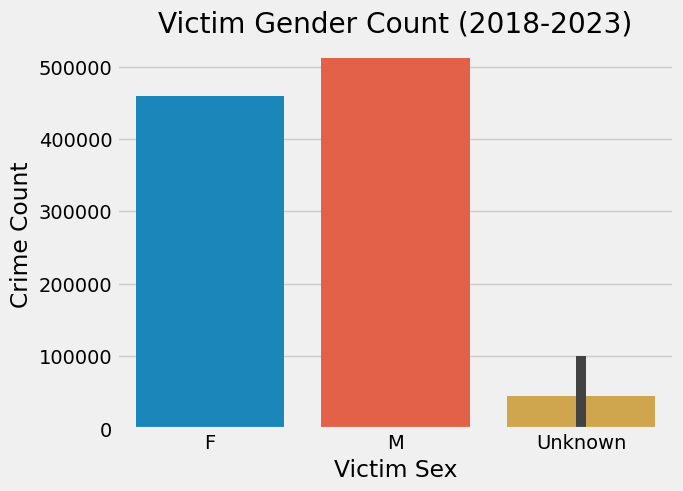

In [40]:
df = vict_sex.replace(['H','N','-','','X'],'Unknown')

sns.barplot(data=df, x = "VICT_SEX", y = "COUNT")
plt.title("Victim Gender Count (2018-2023)")
plt.xlabel("Victim Sex")
plt.ylabel("Crime Count")
plt.show()

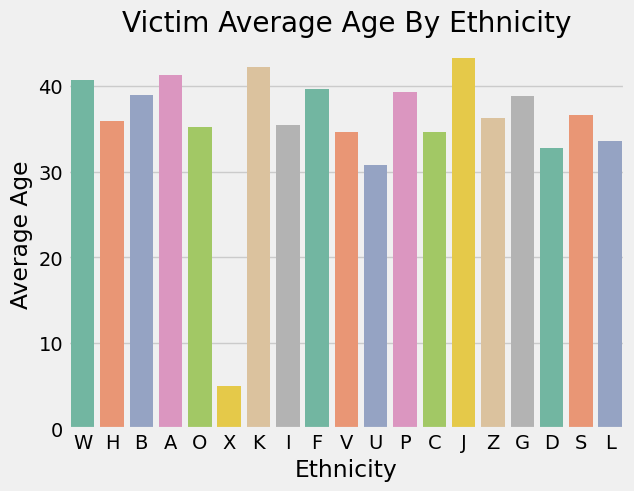

In [41]:
df = vict_avg.loc[~vict_avg['VICT_DESCENT'].isin(['','-'])]

sns.barplot(data = df, x = "VICT_DESCENT", y = "AVG", palette = 'Set2')
plt.title("Victim Average Age By Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Average Age")
plt.show()

In [42]:
Descent_dict = {"Descent Code":['A','B','C','D','F','G','H','I','J','K','L','O','P','S','U','V','W','X','Z'],
            "Name":['Other Asian','Black','Chinese','Cambodian','Filipino','Guamanian','Hispanic/Latin/Mexican',
                  'American Indian/Alaskan Native','Japanese','Korean','Laotian','Other', 'Pacific Islander',
                  'Samoan','Hawaiian','Vietnamese','White','Unknown','Asian Indian']}

Descent = pd.DataFrame(Descent_dict)
Descent

,Descent Code,Name
0,A,Other Asian
1,B,Black
2,C,Chinese
3,D,Cambodian
4,F,Filipino
5,G,Guamanian
6,H,Hispanic/Latin/Mexican
7,I,American Indian/Alaskan Native
8,J,Japanese
9,K,Korean


In [43]:
# library to save a data frame as an image
import dataframe_image as dfi

In [44]:
# save a data frame into an image
# dfi.export(Descent,"Descent.png")

In [45]:
# change matplotlib background style
plt.style.use('bmh')

In [46]:
# shoplifting analysis
shop_under_950 = query("""
                        SELECT YEAR, COUNT(*) AS COUNT
                        FROM totalcrime
                        WHERE CRM_CD_DESC = "SHOPLIFTING - PETTY THEFT ($950 & UNDER)"
                        GROUP BY YEAR
                        ORDER BY YEAR ASC """)

shop_under_950.head()

,YEAR,COUNT
0,2010,3015
1,2011,3357
2,2012,3684
3,2013,3549
4,2014,3536


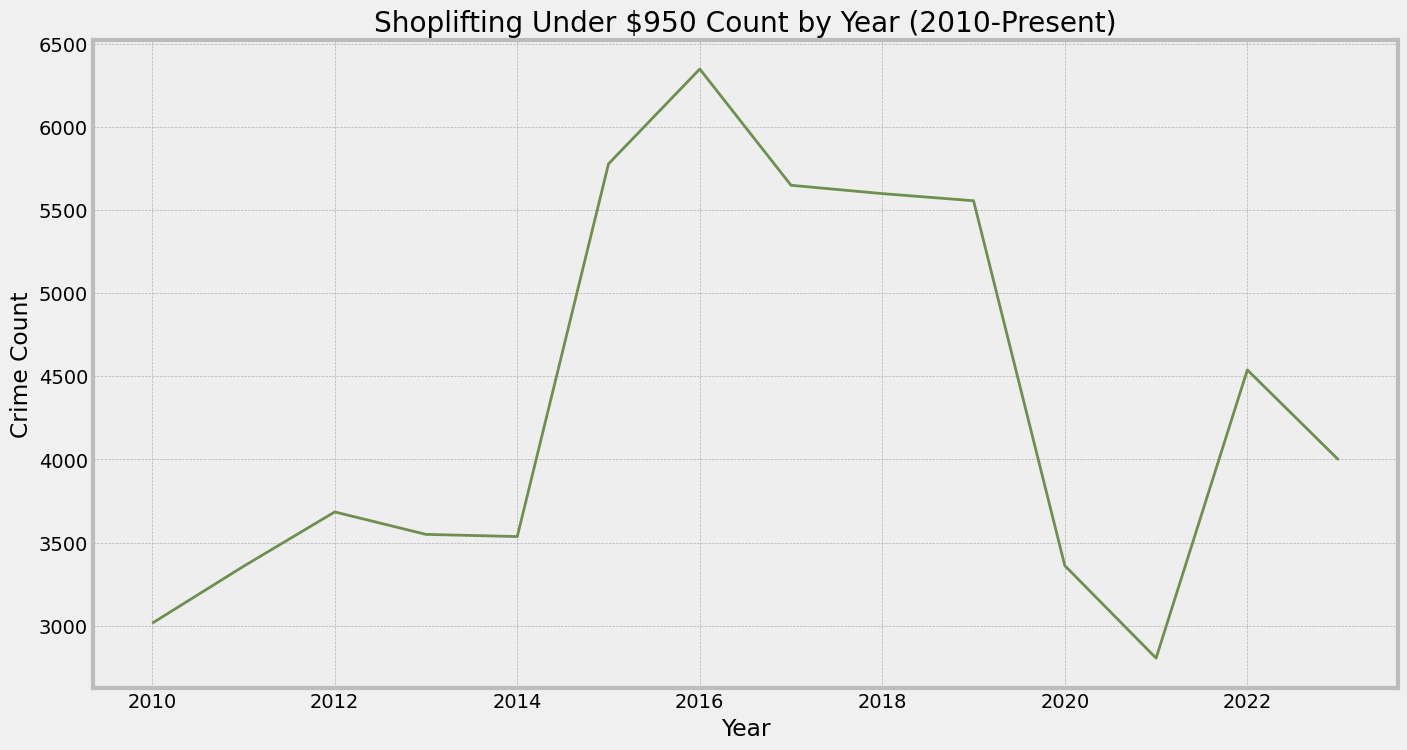

In [47]:
plt.figure(figsize=(15,8))
sns.lineplot(data = shop_under_950, y = "COUNT", x = "YEAR", color = color_pal[3])
plt.title("Shoplifting Under $950 Count by Year (2010-Present)")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.show()

In [48]:
shop_over_951 = query(""" 
                      SELECT YEAR, COUNT(*) AS COUNT
                      FROM totalcrime
                      WHERE CRM_CD_DESC = "SHOPLIFTING-GRAND THEFT ($950.01 & OVER)"
                      GROUP BY YEAR
                      ORDER BY YEAR ASC """)

shop_over_951

,YEAR,COUNT
0,2010,463
1,2011,204
2,2012,180
3,2013,163
4,2014,188
5,2015,432
6,2016,537
7,2017,572
8,2018,814
9,2019,963


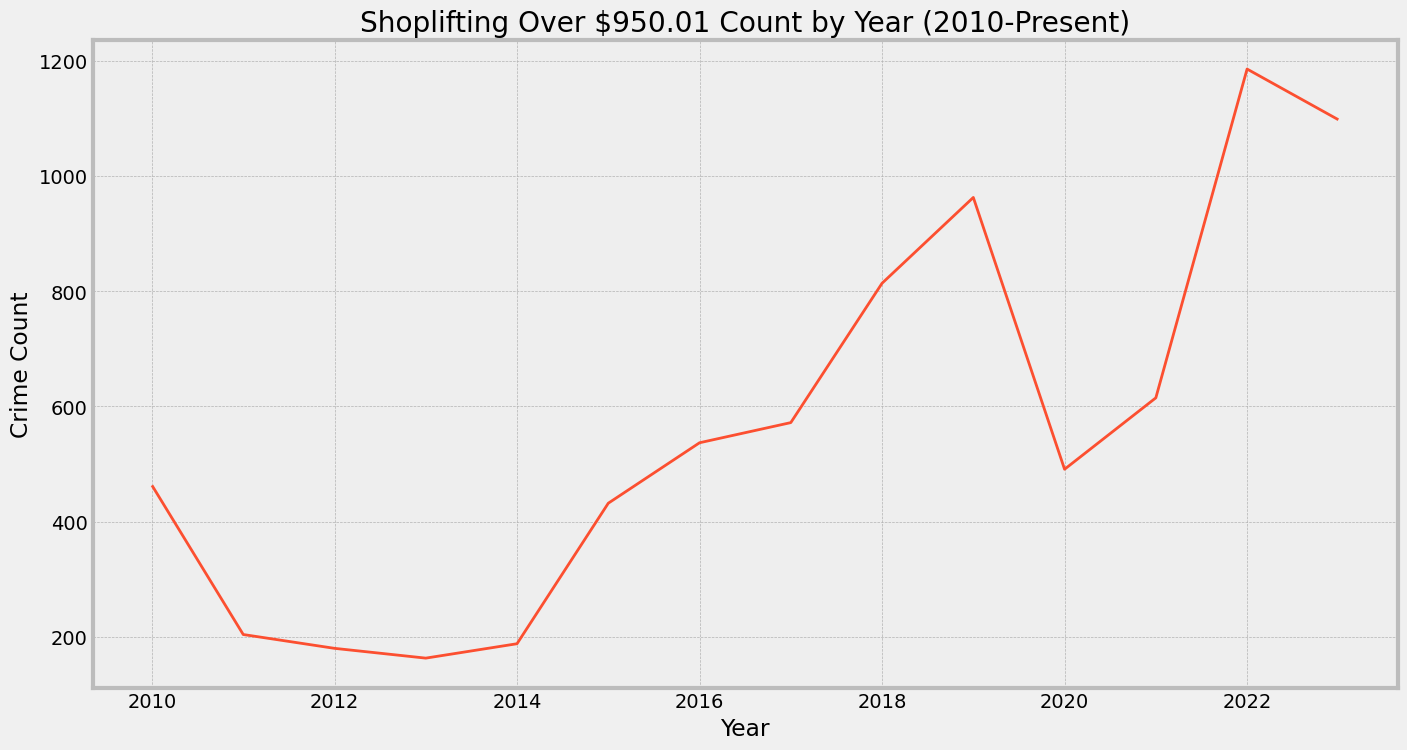

In [49]:
plt.figure(figsize=(15,8))
sns.lineplot(data = shop_over_951, y = "COUNT", x = "YEAR", color = color_pal[1])
plt.title("Shoplifting Over $950.01 Count by Year (2010-Present)")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.show()